### 4.3.8 The Euler-Cromer scheme.

We consider an engineering system with a linear spring, $s(u) = kx,$ and a viscous damper, where the damping force is proportional to $u', f(u') = bu',$ for some constant $b > 0$. This choice may model the vertical spring system in a car.

We may choose simple values for the constants to illustrate basic effects of damping (and later excitations). Chossing the oscilattions to be the simple $u(t) = cost$ function in the undamped case, we may set $m = 1, k = 1, b = 0.3, U_0 = 1, V_0 = 0$. The following function implements this case:

N_t: 5000


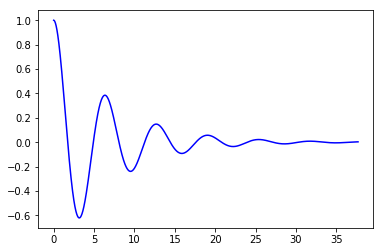

In [5]:
from math import pi
import matplotlib.pyplot as plt

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    from numpy import zeros, linspace
    N_t = int(round(T/dt))
    print('N_t:', N_t)
    t = linspace(0, N_t*dt, N_t+1)
    
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    
    # Initial condition
    u[0] = U_0
    v[0] = V_0
    
    # Step equations forward in time
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def linear_damping():
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    F = lambda t: 0
    
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)

    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()

if __name__ == '__main__':
    linear_damping()